## Synidæmi um hvernig við keyrum innkaupasimulator og teiknum myndir

## Lesum inn nauðysnlega pakka

In [96]:
import sqlalchemy
import pandas as pd
import random
import numpy as np
import datetime as dt
import json
import matplotlib.pyplot as plt

import inventory_opt_and_forecasting_package  as inv


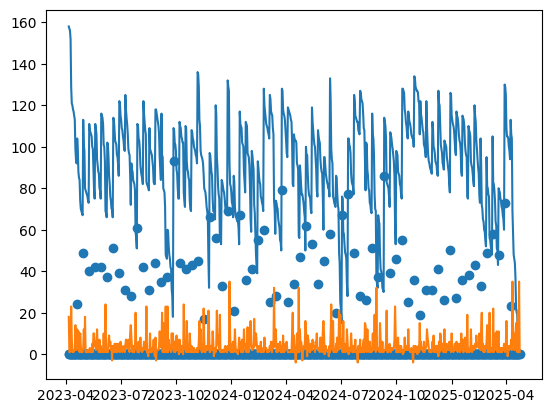

lost_sale    39.0
dtype: float64


In [97]:


inp_data = inv.get_raw_data()

pn = 'PS870B2'
sim_input_his = inp_data.create_rio_his_test_data(pn)
sim_rio_items = inp_data.create_rio_items_test_data(pn).reset_index()
sim_rio_on_order = inp_data.create_on_order_test_data(pn)
periods = 750
number_of_trials = 1000
serv_level = 0.97
sim_rio_items.at[0,'buy_freq']= 10
sim_rio_items.at[0,'del_time']=10


inv_sim = inv.inventory_simulator_with_input_prep(sim_input_his, sim_rio_items, sim_rio_on_order, periods, number_of_trials, serv_level)



fig, ax = plt.subplots()


#ax.plot(dataframe_result.sim_date, dataframe_result.inv)
ax.plot(inv_sim.sim_result.sim_date, inv_sim.sim_result.inv)
ax.plot(inv_sim.sim_result.sim_date, inv_sim.sim_result.forecast)
ax.scatter(inv_sim.sim_result.sim_date, inv_sim.sim_result.deliveries)

plt.show()

#inv_sim.as_is_info
inv_sim.sim_result

print(inv_sim.sim_result[['lost_sale']].sum())


## Plotly graph
### Dæmi um niðurstöður

In [101]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo


def plotly_sim_result():
    trace0 = go.Scatter(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['inv'], mode='lines', fill='tozeroy', marker_color='blue' )
    trace1 = go.Bar(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['forecast'], marker_color='red' )
    trace2 = go.Bar(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['deliveries'], marker_color='green' )


    data = [trace0, trace1, trace2]

    layout = go.Layout(title = 'Simulator result')

    fig = go.Figure(data = data, layout = layout)

    pyo.plot(fig)

In [102]:
plotly_sim_result()